# Deep Learning for Computer Vision

This chapter introduces convolutionval neural networks.

In [0]:
from keras import layers 
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

A convnet is a stack of `Conv2D` and `MaxPooling2D` layers. A convnet takes as input tensors of shape `(image_hight, image_width, image_channels)`. 

In [2]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


The output of every `Conv2D` and `MaxPooling2D` layer is a 3D tensor of shape `(height, width, channels)`. The width and height dimensions tend to shrink as you go deeper in the network. The number of channels is controlled by the first argument passed to the `Conv2D` layers. 

The next step is to feed the last output tensor of shape `(3, 3, 64)` into a densely connected classifier network. First we have to flatten the 3D output to 1D, and then add a few Dense layers on top. 

In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [5]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255


train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11493376/11490434 [==============================] - 3s 0us/step


In [0]:
model.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [7]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 13s 216us/step - loss: 0.1683 - acc: 0.9475
Epoch 2/5
60000/60000 [==============================] - 11s 185us/step - loss: 0.0467 - acc: 0.9857
Epoch 3/5
45248/60000 [=====================>........] - ETA: 2s - loss: 0.0323 - acc: 0.9901

60000/60000 [==============================] - 11s 183us/step - loss: 0.0327 - acc: 0.9897
Epoch 4/5
60000/60000 [==============================] - 11s 185us/step - loss: 0.0244 - acc: 0.9926
Epoch 5/5
60000/60000 [==============================] - 11s 182us/step - loss: 0.0196 - acc: 0.9940


In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 1s 124us/step


0.9919

### The convolution operation

Convolution operate over 3D tensors, called _feature maps_, with two spatial axes (height and width) as well as a depth axis (also called the _channels_ axis). For an RGB image, the dimension of the depth axis is 3, because the image has 3 color channels. For a black-and-white picture the depth is 1 (levels of gray).

The convolution operation extracts patches from its input feature map and applies the same trainsformation to all of these patches, producing an output feature map. This output feature map is still a 3D tensor: it has a width and a height. Its depth can be arbitrary, because the output depth is a parameter of the layer, and the different channels in that depth axis no linger stand for specific colors as in RGB input; rather, they stand for filters. Filters encode specific aspects of the input data: at a high level, a single filter could encode the concept "presence of a face in the input". 

Convolution are defined by two key parameters:
* Size of the patches extracted from the inputs – These are typically 3x3 or 5x5
* Depth of the output feature map – The number of filters computed by the convolution.

In Keras `Conv2D` layers, these parmameters are the first arguments passed to the layer: `Conv2D(output_depth, (window_height, window_width))`.

Padding: 
* "valid" – no padding.
* "same" – pad in such a way as to have an ouput with the same width and height as the input.

### The max-pooling opertaion 

The role of max pooling is to aggresively downsample feature maps, much like strided convolution. 

Max pooling consists of extracting windows from the input feature maps and outputting the max value of each channel. Max pooling is usually done with 2x2 windows and stride 2, in order to downsample the feature maps by a factor of 2. 

In [0]:
model_no_max_pool = models.Sequential()
model_no_max_pool.add(layers.Conv2D(32, (3, 3), activation='relu',
                                   input_shape=(28, 28, 1)))
model_no_max_pool.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_no_max_pool.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [10]:
model_no_max_pool.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 22, 64)        36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [4]:
! git clone https://gitlab.com/Yuraist/ml-datasets.git

Cloning into 'ml-datasets'...
remote: Counting objects: 37396, done.
remote: Compressing objects: 100% (37394/37394), done.
remote: Total 37396 (delta 2), reused 37396 (delta 2)
Receiving objects: 100% (37396/37396), 810.11 MiB | 35.20 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Checking out files: 100% (37500/37500), done.


In [6]:
import os, shutil

original_dataset_dir = '/content/ml-datasets/train'

base_dir = '/content/cats_and_dogs'
if not os.path.exists(base_dir):
  os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Cats images

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)
  
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)
  
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)
  
# Dogs images
  
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)
  
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)
  
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

FileExistsError: ignored

In [41]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total testing cat images:', len(os.listdir(test_cats_dir)))
print('total testing dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total testing cat images: 500
total testing dog images: 500


In [0]:
from keras import layers
from keras import models

In [0]:
from keras.backend import clear_session

clear_session()

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                       input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [0]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

### Data preprocessing

1. Read the picture files
2. Decode the JPEG content to RGB grids of pixels
3. Convert these into floating-point tensors
4. Rescale the pixel values (between 0 and 255) to the [0, 1] interval

Keras has a module with image-processing helper tools, located at `keras.preprocessing.image`. 

In [19]:
from keras.preprocessing.image import ImageDataGenerator

# Rescale all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Resize all train images to 150 x 150
train_generator = train_datagen.flow_from_directory(
  train_dir, 
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

# Resize all validation images to 150 x 150
validation_generator = test_datagen.flow_from_directory(
  validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


When using `fit_generator`, you can pass a `validation_data` argument, much as with the `fit` method. You should also specify the `validation_steps` argument, which tells the process how many batches to draw from the validation generator for evaluation.

In [20]:
history = model.fit_generator(
    train_generator, 
    steps_per_epoch=100,
    epochs=30, 
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 12s 117ms/step - loss: 0.6917 - acc: 0.5265 - val_loss: 0.6708 - val_acc: 0.5810
Epoch 2/30
100/100 [==============================] - 11s 109ms/step - loss: 0.6508 - acc: 0.6125 - val_loss: 0.6200 - val_acc: 0.6590
Epoch 3/30
100/100 [==============================] - 11s 109ms/step - loss: 0.5910 - acc: 0.6910 - val_loss: 0.5976 - val_acc: 0.6700
Epoch 4/30
 72/100 [====================>.........] - ETA: 1s - loss: 0.5642 - acc: 0.7028

100/100 [==============================] - 11s 110ms/step - loss: 0.5596 - acc: 0.7060 - val_loss: 0.5915 - val_acc: 0.6840
Epoch 5/30
100/100 [==============================] - 11s 109ms/step - loss: 0.5342 - acc: 0.7285 - val_loss: 0.5829 - val_acc: 0.6740
Epoch 6/30
100/100 [==============================] - 11s 109ms/step - loss: 0.5096 - acc: 0.7475 - val_loss: 0.6415 - val_acc: 0.6400
Epoch 7/30
 91/100 [==========================>...] - ETA: 0s - loss: 0.4885 - acc: 0.7665

100/100 [==============================] - 11s 110ms/step - loss: 0.4842 - acc: 0.7700 - val_loss: 0.6112 - val_acc: 0.6670
Epoch 8/30
100/100 [==============================] - 11s 110ms/step - loss: 0.4522 - acc: 0.7810 - val_loss: 0.5708 - val_acc: 0.7120
Epoch 9/30
100/100 [==============================] - 11s 112ms/step - loss: 0.4277 - acc: 0.8020 - val_loss: 0.6017 - val_acc: 0.6930
Epoch 10/30
 95/100 [===========================>..] - ETA: 0s - loss: 0.4023 - acc: 0.8163

100/100 [==============================] - 11s 109ms/step - loss: 0.4025 - acc: 0.8170 - val_loss: 0.5901 - val_acc: 0.7070
Epoch 11/30
100/100 [==============================] - 11s 109ms/step - loss: 0.3799 - acc: 0.8230 - val_loss: 0.5478 - val_acc: 0.7150
Epoch 12/30
100/100 [==============================] - 11s 109ms/step - loss: 0.3530 - acc: 0.8465 - val_loss: 0.5538 - val_acc: 0.7240
Epoch 13/30
 90/100 [==========================>...] - ETA: 0s - loss: 0.3350 - acc: 0.8533

100/100 [==============================] - 11s 109ms/step - loss: 0.3329 - acc: 0.8545 - val_loss: 0.5760 - val_acc: 0.7250
Epoch 14/30
100/100 [==============================] - 11s 109ms/step - loss: 0.3047 - acc: 0.8755 - val_loss: 0.5989 - val_acc: 0.7200
Epoch 15/30
100/100 [==============================] - 11s 109ms/step - loss: 0.2845 - acc: 0.8835 - val_loss: 0.5700 - val_acc: 0.7350
Epoch 16/30
 91/100 [==========================>...] - ETA: 0s - loss: 0.2686 - acc: 0.8857

100/100 [==============================] - 11s 110ms/step - loss: 0.2674 - acc: 0.8890 - val_loss: 0.5800 - val_acc: 0.7480
Epoch 17/30
100/100 [==============================] - 11s 108ms/step - loss: 0.2471 - acc: 0.9005 - val_loss: 0.5984 - val_acc: 0.7350
Epoch 18/30
100/100 [==============================] - 11s 110ms/step - loss: 0.2269 - acc: 0.9105 - val_loss: 0.6481 - val_acc: 0.7260
Epoch 19/30
 92/100 [==========================>...] - ETA: 0s - loss: 0.2104 - acc: 0.9239

100/100 [==============================] - 11s 111ms/step - loss: 0.2086 - acc: 0.9245 - val_loss: 0.6330 - val_acc: 0.7330
Epoch 20/30
100/100 [==============================] - 11s 111ms/step - loss: 0.1831 - acc: 0.9325 - val_loss: 0.6406 - val_acc: 0.7480
Epoch 21/30
100/100 [==============================] - 11s 112ms/step - loss: 0.1701 - acc: 0.9405 - val_loss: 0.7212 - val_acc: 0.7130
Epoch 22/30
 93/100 [==========================>...] - ETA: 0s - loss: 0.1527 - acc: 0.9462

100/100 [==============================] - 11s 111ms/step - loss: 0.1519 - acc: 0.9465 - val_loss: 0.6779 - val_acc: 0.7360
Epoch 23/30
100/100 [==============================] - 11s 110ms/step - loss: 0.1305 - acc: 0.9580 - val_loss: 0.7884 - val_acc: 0.7180
Epoch 24/30
100/100 [==============================] - 11s 111ms/step - loss: 0.1124 - acc: 0.9630 - val_loss: 0.7395 - val_acc: 0.7350
Epoch 25/30
 94/100 [===========================>..] - ETA: 0s - loss: 0.1002 - acc: 0.9654

100/100 [==============================] - 11s 110ms/step - loss: 0.0985 - acc: 0.9660 - val_loss: 0.7755 - val_acc: 0.7380
Epoch 26/30
100/100 [==============================] - 11s 109ms/step - loss: 0.0918 - acc: 0.9745 - val_loss: 0.7532 - val_acc: 0.7480
Epoch 27/30
100/100 [==============================] - 11s 110ms/step - loss: 0.0763 - acc: 0.9790 - val_loss: 0.8021 - val_acc: 0.7320
Epoch 28/30
 96/100 [===========================>..] - ETA: 0s - loss: 0.0638 - acc: 0.9854

100/100 [==============================] - 11s 109ms/step - loss: 0.0625 - acc: 0.9860 - val_loss: 0.9106 - val_acc: 0.7350
Epoch 29/30
100/100 [==============================] - 11s 110ms/step - loss: 0.0544 - acc: 0.9860 - val_loss: 0.8807 - val_acc: 0.7370
Epoch 30/30
100/100 [==============================] - 11s 113ms/step - loss: 0.0509 - acc: 0.9850 - val_loss: 0.9593 - val_acc: 0.7290


In [0]:
model.save('cats_and_dogs_small_1.h5')

#### Displaying curves of loss and accuracy during training

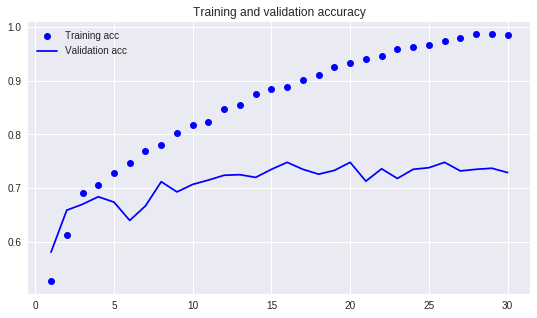

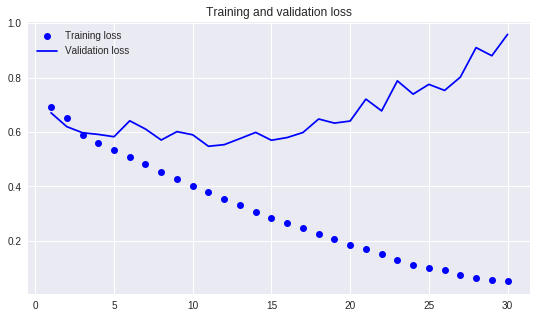

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(9, 5))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(9, 5))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The validation loss reaches its minimum after only 5 epochs and the stalls.

## Fighting overfitting

### Using data augmentration

Data augmentation takes the approach of generating more training data from existring training samples, by augmenting the samples via a number of random transformations that yield believable-looking images.

In [0]:
datagen = ImageDataGenerator(
    rotation_range=40, 
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

These are just a few of the options available:
* `rotation_range` is a value in degrees (1-180), a range within which to randomly rotate pictures
* `width_shift` and `height_shift` are ranges within which to randomly translate pictures vertically or horizontally
* `shear_range` is for randomly applying shearing transformations
* `zoom_range` is for randomly zooming inside pictures
* `horizontal_flip` is for randomly flipping half the images horizontaly – relevant whene there are no assumption of horizontal asymmetry
* `fill_mode` is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/heihgt shift

#### Displaying some randomly augmented training images

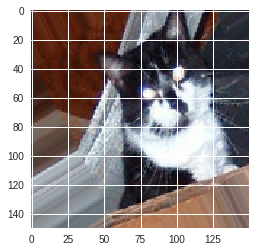

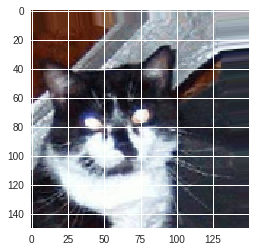

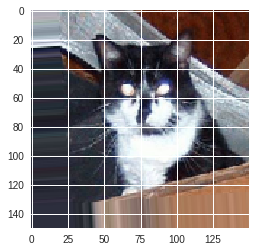

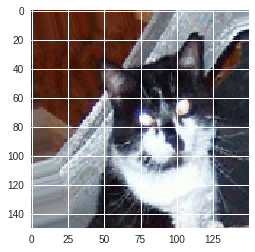

In [27]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for 
          fname in os.listdir(train_cats_dir)]

img_path = fnames[3]
# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# Generate batches of randomly transformed images.
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break
    
plt.show()

### Using Dropout

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4))

In [30]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

# The validation data shouldn't be augmented
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150), # resize all images to 150 x 150
    batch_size=32, 
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [32]:
history = model.fit_generator(
    train_generator, 
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/100
100/100 [==============================] - 35s 355ms/step - loss: 0.6936 - val_loss: 0.6811
Epoch 2/100
100/100 [==============================] - 32s 320ms/step - loss: 0.6774 - val_loss: 0.6702
Epoch 3/100
100/100 [==============================] - 31s 312ms/step - loss: 0.6690 - val_loss: 0.6472
Epoch 4/100
100/100 [==============================] - 32s 317ms/step - loss: 0.6491 - val_loss: 0.6272
Epoch 5/100
 12/100 [==>...........................] - ETA: 6s - loss: 0.6534

100/100 [==============================] - 31s 312ms/step - loss: 0.6361 - val_loss: 0.6510
Epoch 6/100
100/100 [==============================] - 34s 343ms/step - loss: 0.6236 - val_loss: 0.6023
Epoch 7/100
100/100 [==============================] - 32s 316ms/step - loss: 0.6048 - val_loss: 0.5995
Epoch 8/100
100/100 [==============================] - 32s 319ms/step - loss: 0.6058 - val_loss: 0.5835
Epoch 9/100
 24/100 [======>.......................] - ETA: 13s - loss: 0.5875

100/100 [==============================] - 32s 317ms/step - loss: 0.5822 - val_loss: 0.5558
Epoch 10/100
100/100 [==============================] - 31s 309ms/step - loss: 0.5852 - val_loss: 0.6073
Epoch 11/100
100/100 [==============================] - 33s 330ms/step - loss: 0.5759 - val_loss: 0.5494
Epoch 12/100
100/100 [==============================] - 32s 317ms/step - loss: 0.5654 - val_loss: 0.5432
Epoch 13/100
 25/100 [======>.......................] - ETA: 13s - loss: 0.5723

100/100 [==============================] - 31s 315ms/step - loss: 0.5684 - val_loss: 0.5927
Epoch 14/100
100/100 [==============================] - 32s 319ms/step - loss: 0.5620 - val_loss: 0.5503
Epoch 15/100
100/100 [==============================] - 32s 318ms/step - loss: 0.5586 - val_loss: 0.5538
Epoch 16/100
100/100 [==============================] - 32s 317ms/step - loss: 0.5550 - val_loss: 0.5477
Epoch 17/100
 25/100 [======>.......................] - ETA: 13s - loss: 0.5515

100/100 [==============================] - 30s 297ms/step - loss: 0.5420 - val_loss: 0.5448
Epoch 18/100
100/100 [==============================] - 35s 346ms/step - loss: 0.5327 - val_loss: 0.5729
Epoch 19/100
100/100 [==============================] - 32s 321ms/step - loss: 0.5393 - val_loss: 0.5302
Epoch 20/100
100/100 [==============================] - 32s 319ms/step - loss: 0.5169 - val_loss: 0.5072
Epoch 21/100
 26/100 [======>.......................] - ETA: 13s - loss: 0.5317

100/100 [==============================] - 32s 323ms/step - loss: 0.5274 - val_loss: 0.5051
Epoch 22/100
100/100 [==============================] - 31s 308ms/step - loss: 0.5270 - val_loss: 0.4866
Epoch 23/100
100/100 [==============================] - 33s 333ms/step - loss: 0.5114 - val_loss: 0.5332
Epoch 24/100
100/100 [==============================] - 32s 320ms/step - loss: 0.5202 - val_loss: 0.4961
Epoch 25/100
 26/100 [======>.......................] - ETA: 13s - loss: 0.5116

100/100 [==============================] - 32s 319ms/step - loss: 0.5188 - val_loss: 0.4845
Epoch 26/100
100/100 [==============================] - 32s 318ms/step - loss: 0.5088 - val_loss: 0.5246
Epoch 27/100
100/100 [==============================] - 31s 312ms/step - loss: 0.5034 - val_loss: 0.4774
Epoch 28/100
100/100 [==============================] - 33s 329ms/step - loss: 0.5036 - val_loss: 0.4896
Epoch 29/100
 25/100 [======>.......................] - ETA: 13s - loss: 0.5094

100/100 [==============================] - 32s 316ms/step - loss: 0.4889 - val_loss: 0.5070
Epoch 30/100
100/100 [==============================] - 32s 318ms/step - loss: 0.5001 - val_loss: 0.5222
Epoch 31/100
100/100 [==============================] - 32s 319ms/step - loss: 0.4956 - val_loss: 0.4966
Epoch 32/100
100/100 [==============================] - 32s 316ms/step - loss: 0.4831 - val_loss: 0.5111
Epoch 33/100
 24/100 [======>.......................] - ETA: 13s - loss: 0.4768

100/100 [==============================] - 32s 318ms/step - loss: 0.4898 - val_loss: 0.5307
Epoch 34/100
100/100 [==============================] - 31s 308ms/step - loss: 0.4855 - val_loss: 0.4767
Epoch 35/100
100/100 [==============================] - 35s 348ms/step - loss: 0.4670 - val_loss: 0.6675
Epoch 36/100
100/100 [==============================] - 32s 319ms/step - loss: 0.4842 - val_loss: 0.4587
Epoch 37/100
 22/100 [=====>........................] - ETA: 12s - loss: 0.4390

100/100 [==============================] - 32s 323ms/step - loss: 0.4794 - val_loss: 0.4508
Epoch 38/100
100/100 [==============================] - 32s 320ms/step - loss: 0.4713 - val_loss: 0.4575
Epoch 39/100
100/100 [==============================] - 31s 309ms/step - loss: 0.4696 - val_loss: 0.5256
Epoch 40/100
100/100 [==============================] - 34s 335ms/step - loss: 0.4584 - val_loss: 0.4634
Epoch 41/100
 24/100 [======>.......................] - ETA: 13s - loss: 0.4707

100/100 [==============================] - 32s 323ms/step - loss: 0.4545 - val_loss: 0.4413
Epoch 42/100
100/100 [==============================] - 32s 317ms/step - loss: 0.4621 - val_loss: 0.4594
Epoch 43/100
100/100 [==============================] - 32s 316ms/step - loss: 0.4511 - val_loss: 0.4377
Epoch 44/100
100/100 [==============================] - 32s 319ms/step - loss: 0.4568 - val_loss: 0.4575
Epoch 45/100
 25/100 [======>.......................] - ETA: 15s - loss: 0.4253

100/100 [==============================] - 32s 324ms/step - loss: 0.4416 - val_loss: 0.4642
Epoch 46/100
100/100 [==============================] - 32s 317ms/step - loss: 0.4600 - val_loss: 0.4669
Epoch 47/100
100/100 [==============================] - 32s 322ms/step - loss: 0.4499 - val_loss: 0.5135
Epoch 48/100
100/100 [==============================] - 32s 315ms/step - loss: 0.4371 - val_loss: 0.4517
Epoch 49/100
 24/100 [======>.......................] - ETA: 13s - loss: 0.4584

100/100 [==============================] - 32s 318ms/step - loss: 0.4305 - val_loss: 0.5205
Epoch 50/100
100/100 [==============================] - 32s 322ms/step - loss: 0.4445 - val_loss: 0.4494
Epoch 51/100
100/100 [==============================] - 31s 305ms/step - loss: 0.4363 - val_loss: 0.4467
Epoch 52/100
100/100 [==============================] - 34s 342ms/step - loss: 0.4183 - val_loss: 0.4477
Epoch 53/100
 24/100 [======>.......................] - ETA: 13s - loss: 0.4577

100/100 [==============================] - 32s 322ms/step - loss: 0.4458 - val_loss: 0.4453
Epoch 54/100
100/100 [==============================] - 32s 318ms/step - loss: 0.4278 - val_loss: 0.4713
Epoch 55/100
100/100 [==============================] - 32s 321ms/step - loss: 0.4240 - val_loss: 0.5829
Epoch 56/100
100/100 [==============================] - 31s 310ms/step - loss: 0.4247 - val_loss: 0.4280
Epoch 57/100
 26/100 [======>.......................] - ETA: 17s - loss: 0.4363

100/100 [==============================] - 33s 334ms/step - loss: 0.4185 - val_loss: 0.5458
Epoch 58/100
100/100 [==============================] - 31s 313ms/step - loss: 0.4089 - val_loss: 0.4132
Epoch 59/100
100/100 [==============================] - 31s 313ms/step - loss: 0.4146 - val_loss: 0.4274
Epoch 60/100
100/100 [==============================] - 32s 321ms/step - loss: 0.4074 - val_loss: 0.5286
Epoch 61/100
 26/100 [======>.......................] - ETA: 13s - loss: 0.4114

100/100 [==============================] - 32s 319ms/step - loss: 0.4109 - val_loss: 0.4269
Epoch 62/100
100/100 [==============================] - 32s 322ms/step - loss: 0.4174 - val_loss: 0.4458
Epoch 63/100
100/100 [==============================] - 33s 327ms/step - loss: 0.4095 - val_loss: 0.4927
Epoch 64/100
100/100 [==============================] - 32s 322ms/step - loss: 0.3947 - val_loss: 0.4639
Epoch 65/100
 25/100 [======>.......................] - ETA: 13s - loss: 0.3961

100/100 [==============================] - 32s 322ms/step - loss: 0.4018 - val_loss: 0.4710
Epoch 66/100
100/100 [==============================] - 32s 319ms/step - loss: 0.3971 - val_loss: 0.4711
Epoch 67/100
100/100 [==============================] - 32s 324ms/step - loss: 0.3861 - val_loss: 0.4314
Epoch 68/100
100/100 [==============================] - 31s 309ms/step - loss: 0.4029 - val_loss: 0.4694
Epoch 69/100
 25/100 [======>.......................] - ETA: 19s - loss: 0.3842

100/100 [==============================] - 34s 341ms/step - loss: 0.3967 - val_loss: 0.4859
Epoch 70/100
100/100 [==============================] - 32s 322ms/step - loss: 0.4047 - val_loss: 0.4964
Epoch 71/100
100/100 [==============================] - 32s 322ms/step - loss: 0.3891 - val_loss: 0.6764
Epoch 72/100
100/100 [==============================] - 32s 317ms/step - loss: 0.3814 - val_loss: 0.4244
Epoch 73/100
 25/100 [======>.......................] - ETA: 13s - loss: 0.3938

100/100 [==============================] - 32s 319ms/step - loss: 0.3795 - val_loss: 0.4873
Epoch 74/100
100/100 [==============================] - 33s 333ms/step - loss: 0.3881 - val_loss: 0.5298
Epoch 75/100
100/100 [==============================] - 32s 317ms/step - loss: 0.3762 - val_loss: 0.4490
Epoch 76/100
100/100 [==============================] - 32s 323ms/step - loss: 0.3710 - val_loss: 0.4246
Epoch 77/100
 25/100 [======>.......................] - ETA: 13s - loss: 0.4127

100/100 [==============================] - 32s 322ms/step - loss: 0.3852 - val_loss: 0.4699
Epoch 78/100
100/100 [==============================] - 31s 314ms/step - loss: 0.3841 - val_loss: 0.4980
Epoch 79/100
100/100 [==============================] - 32s 316ms/step - loss: 0.3627 - val_loss: 0.4352
Epoch 80/100
100/100 [==============================] - 30s 301ms/step - loss: 0.3797 - val_loss: 0.5100
Epoch 81/100
 25/100 [======>.......................] - ETA: 22s - loss: 0.3479

100/100 [==============================] - 35s 352ms/step - loss: 0.3673 - val_loss: 0.4647
Epoch 82/100
100/100 [==============================] - 32s 325ms/step - loss: 0.3591 - val_loss: 0.4715
Epoch 83/100
100/100 [==============================] - 32s 320ms/step - loss: 0.3682 - val_loss: 0.4205
Epoch 84/100
100/100 [==============================] - 32s 317ms/step - loss: 0.3701 - val_loss: 0.4489
Epoch 85/100
 25/100 [======>.......................] - ETA: 13s - loss: 0.3410

100/100 [==============================] - 30s 303ms/step - loss: 0.3553 - val_loss: 0.4068
Epoch 86/100
100/100 [==============================] - 34s 337ms/step - loss: 0.3536 - val_loss: 0.4027
Epoch 87/100
100/100 [==============================] - 32s 317ms/step - loss: 0.3722 - val_loss: 0.4137
Epoch 88/100
100/100 [==============================] - 31s 314ms/step - loss: 0.3452 - val_loss: 0.4527
Epoch 89/100
 26/100 [======>.......................] - ETA: 13s - loss: 0.3345

100/100 [==============================] - 32s 320ms/step - loss: 0.3553 - val_loss: 0.3805
Epoch 90/100
100/100 [==============================] - 32s 317ms/step - loss: 0.3504 - val_loss: 0.4268
Epoch 91/100
100/100 [==============================] - 33s 328ms/step - loss: 0.3497 - val_loss: 0.3914
Epoch 92/100
100/100 [==============================] - 32s 322ms/step - loss: 0.3490 - val_loss: 0.3740
Epoch 93/100
 25/100 [======>.......................] - ETA: 13s - loss: 0.3148

100/100 [==============================] - 32s 317ms/step - loss: 0.3417 - val_loss: 0.4268
Epoch 94/100
100/100 [==============================] - 32s 320ms/step - loss: 0.3400 - val_loss: 0.4210
Epoch 95/100
100/100 [==============================] - 33s 325ms/step - loss: 0.3344 - val_loss: 0.3811
Epoch 96/100
100/100 [==============================] - 32s 319ms/step - loss: 0.3339 - val_loss: 0.4389
Epoch 97/100
 24/100 [======>.......................] - ETA: 13s - loss: 0.3549

100/100 [==============================] - 30s 303ms/step - loss: 0.3237 - val_loss: 0.4285
Epoch 98/100
100/100 [==============================] - 35s 347ms/step - loss: 0.3268 - val_loss: 0.4856
Epoch 99/100
100/100 [==============================] - 32s 323ms/step - loss: 0.3408 - val_loss: 0.4085
Epoch 100/100
100/100 [==============================] - 32s 321ms/step - loss: 0.3375 - val_loss: 0.4616


In [0]:
model.save('cats_and_dogs_small_2.h5')

In [0]:
from google.colab import files

files.download('cats_and_dogs_small_2.h5')

In [36]:
history.history.keys()

dict_keys(['val_loss', 'loss'])

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(9, 5))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(9, 5))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

KeyError: ignored

Accuracy reaches 82%

In [46]:
! ls

cats_and_dogs		  cats_and_dogs_small_2.h5  ml-datasets
cats_and_dogs_small_1.h5  datalab


## Using a pretrained convnet

A common and highly effective approach to deep learning on small image datasets is to use a pretrained network. A pretrained network is a saved network that was previously trained on a large dataset. If this original dataset is large enough and general enough, then the spatial hierarchy of features learned by the pretrained network can effectively act as a generic model of the visual world, and hence its features can prove useful for many different computer-classes than those of the original task. 

There are two ways to use a pretrained network: _feature extraction_ and _fine-tuning_.

### Feature extraction

Feature extraction consists of using the representations learned by a previous network to extract interesting features from new samples. These features are then run throuugh a new classifier, which is trained from scratch. 

In the case of convnets, feature extraction consists of taking the convolutional base of a previously trained network, running the new data through it, and training a new classifier on top of the output. 

The level of generality of the representations extracted by specific convolution layers depends on the depth of the layer in the model. Layers that come earlier in the model extract local, highly generic feature maps, whereas layers that are higher up extract more-abstract concept.

The VGG16 model comes prepackaged with Keras. You can import it from the `keras.applicaions` module. Here's the list of image-classification models that are available as part of `keras.applications`:
* Xception
* Inception V3
* Resnet
* VGG16
* VGG19
* MobileNet

In [7]:
from keras.applications import VGG16
from keras import models, layers

conv_base = VGG16(weights='imagenet',
                 include_top=False, 
                 input_shape=(150, 150, 3))

Using TensorFlow backend.


58892288/58889256 [==============================] - 10s 0us/step


* `weights` specifies the weight checkpoint from which to initialize the model
* `include_top` refers to including or not the densely connected classifier on top of the networl
* `input_shape` is the shape of the image tensors that you'll feed to the network. If you don't pass it, the network will be able to process inputs of any size.

In [48]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

There are two ways to proceed:
* Running the convolutional base over your dataset, recording its output to a Numpy array on disk, and then using data as input to a standalone, densely connected classifier. 
* Extending the model you have by adding Dense layers on top and running the whole thing end to end on the input data.

#### Fast feature extraction without data augmentation

In [11]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(
      directory,
      target_size=(150,150),
      batch_size=batch_size,
      class_mode='binary'
  )
  
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size: (i + 1) * batch_size] = features_batch
    labels[i * batch_size: (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      break
  return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


The extracted features are currently of shape (samples, 4, 4, 512). You'll feed them to a densely connected classifier, so first you must flatten them to (samples, 8192)

In [0]:
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

At this point, you can define your densely connected classifier and train it on the data and labels that you just recorded.

In [52]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(train_features, train_labels, 
                   epochs=30,
                   batch_size=20,
                   validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 632us/step - loss: 0.6113 - acc: 0.6600 - val_loss: 0.4319 - val_acc: 0.8420
Epoch 2/30
2000/2000 [==============================] - 1s 498us/step - loss: 0.4324 - acc: 0.8015 - val_loss: 0.3545 - val_acc: 0.8700
Epoch 3/30
2000/2000 [==============================] - 1s 533us/step - loss: 0.3630 - acc: 0.8375 - val_loss: 0.3226 - val_acc: 0.8720
Epoch 4/30
2000/2000 [==============================] - 1s 535us/step - loss: 0.3218 - acc: 0.8605 - val_loss: 0.3001 - val_acc: 0.8780
Epoch 5/30
2000/2000 [==============================] - 1s 545us/step - loss: 0.2887 - acc: 0.8820 - val_loss: 0.2818 - val_acc: 0.8900
Epoch 6/30
2000/2000 [==============================] - 1s 540us/step - loss: 0.2634 - acc: 0.9010 - val_loss: 0.2823 - val_acc: 0.8770
Epoch 7/30
2000/2000 [==============================] - 1s 538us/step - loss: 0.2382 - acc: 0.9070 - val_loss: 0.2649 - val_acc: 0.8940


2000/2000 [==============================] - 1s 537us/step - loss: 0.2147 - acc: 0.9185 - val_loss: 0.2547 - val_acc: 0.8970
Epoch 10/30
2000/2000 [==============================] - 1s 536us/step - loss: 0.2112 - acc: 0.9225 - val_loss: 0.2495 - val_acc: 0.9010
Epoch 11/30
2000/2000 [==============================] - 1s 539us/step - loss: 0.1998 - acc: 0.9215 - val_loss: 0.2522 - val_acc: 0.9000
Epoch 12/30
2000/2000 [==============================] - 1s 536us/step - loss: 0.1882 - acc: 0.9325 - val_loss: 0.2421 - val_acc: 0.8990
Epoch 13/30
2000/2000 [==============================] - 1s 531us/step - loss: 0.1739 - acc: 0.9385 - val_loss: 0.2410 - val_acc: 0.9040
Epoch 14/30
2000/2000 [==============================] - 1s 525us/step - loss: 0.1774 - acc: 0.9335 - val_loss: 0.2432 - val_acc: 0.9020
Epoch 15/30
2000/2000 [==============================] - 1s 537us/step - loss: 0.1652 - acc: 0.9415 - val_loss: 0.2392 - val_acc: 0.9040
Epoch 16/30
2000/2000 [==============================

2000/2000 [==============================] - 1s 523us/step - loss: 0.1475 - acc: 0.9485 - val_loss: 0.2452 - val_acc: 0.8990
Epoch 18/30
2000/2000 [==============================] - 1s 531us/step - loss: 0.1395 - acc: 0.9550 - val_loss: 0.2385 - val_acc: 0.9040
Epoch 19/30
2000/2000 [==============================] - 1s 544us/step - loss: 0.1339 - acc: 0.9525 - val_loss: 0.2361 - val_acc: 0.9010
Epoch 20/30
2000/2000 [==============================] - 1s 536us/step - loss: 0.1323 - acc: 0.9550 - val_loss: 0.2389 - val_acc: 0.9010
Epoch 21/30
2000/2000 [==============================] - 1s 532us/step - loss: 0.1265 - acc: 0.9570 - val_loss: 0.2351 - val_acc: 0.8990
Epoch 22/30
2000/2000 [==============================] - 1s 546us/step - loss: 0.1293 - acc: 0.9555 - val_loss: 0.2358 - val_acc: 0.9050
Epoch 23/30
2000/2000 [==============================] - 1s 522us/step - loss: 0.1155 - acc: 0.9610 - val_loss: 0.2362 - val_acc: 0.9040
Epoch 24/30
2000/2000 [==============================

2000/2000 [==============================] - 1s 531us/step - loss: 0.1078 - acc: 0.9665 - val_loss: 0.2353 - val_acc: 0.9040
Epoch 26/30
2000/2000 [==============================] - 1s 527us/step - loss: 0.1030 - acc: 0.9685 - val_loss: 0.2356 - val_acc: 0.9020
Epoch 27/30
2000/2000 [==============================] - 1s 530us/step - loss: 0.0994 - acc: 0.9665 - val_loss: 0.2475 - val_acc: 0.9010
Epoch 28/30
2000/2000 [==============================] - 1s 540us/step - loss: 0.0984 - acc: 0.9685 - val_loss: 0.2406 - val_acc: 0.9030
Epoch 29/30
2000/2000 [==============================] - 1s 529us/step - loss: 0.0912 - acc: 0.9745 - val_loss: 0.2373 - val_acc: 0.9020
Epoch 30/30
2000/2000 [==============================] - 1s 526us/step - loss: 0.0859 - acc: 0.9740 - val_loss: 0.2469 - val_acc: 0.9010


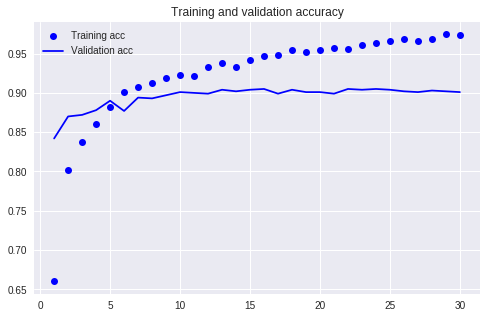

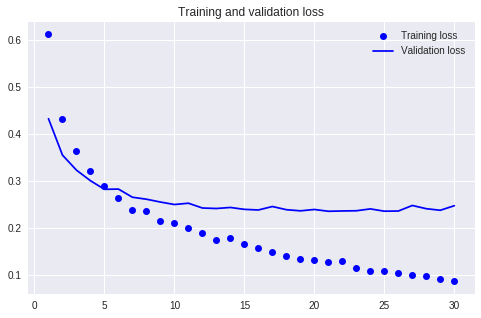

In [53]:
history = history.history
acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(8, 5))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(8, 5))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend() 

plt.show()

Validation accuracy ~ 90%

#### Feature extraction with data augmentation

Because models behave just like layers, you can add a model to a Sequential model just like you would add a layer.

In [0]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [57]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


Before you compile and train the model, it's very important to freeze the convolutional base. _Freezing_ a layer or set of layers means preventing their weights from being updated during training. 

In Keras, you freeze a network by setting its `trainable` attribute to False.

In [0]:
conv_base.trainable = False

In [16]:
from keras import optimizers

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20, 
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=2e-5),
             metrics=['acc'])

history = model.fit_generator(
    train_generator, 
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 29s 286ms/step - loss: 0.5992 - acc: 0.6910 - val_loss: 0.4395 - val_acc: 0.8350
Epoch 2/30
100/100 [==============================] - 27s 270ms/step - loss: 0.4869 - acc: 0.7785 - val_loss: 0.3695 - val_acc: 0.8470
Epoch 3/30
100/100 [==============================] - 27s 271ms/step - loss: 0.4301 - acc: 0.8055 - val_loss: 0.3285 - val_acc: 0.8670
Epoch 4/30
 11/100 [==>...........................] - ETA: 12s - loss: 0.4401 - acc: 0.7955

100/100 [==============================] - 27s 270ms/step - loss: 0.4109 - acc: 0.8195 - val_loss: 0.3039 - val_acc: 0.8750
Epoch 5/30
100/100 [==============================] - 27s 269ms/step - loss: 0.3837 - acc: 0.8255 - val_loss: 0.2920 - val_acc: 0.8810
Epoch 6/30
100/100 [==============================] - 27s 269ms/step - loss: 0.3665 - acc: 0.8325 - val_loss: 0.2933 - val_acc: 0.8810
Epoch 7/30
 74/100 [=====================>........] - ETA: 5s - loss: 0.3533 - acc: 0.8446

100/100 [==============================] - 27s 273ms/step - loss: 0.3550 - acc: 0.8445 - val_loss: 0.2845 - val_acc: 0.8760
Epoch 8/30
100/100 [==============================] - 27s 272ms/step - loss: 0.3464 - acc: 0.8535 - val_loss: 0.2703 - val_acc: 0.8840
Epoch 9/30
100/100 [==============================] - 27s 275ms/step - loss: 0.3460 - acc: 0.8515 - val_loss: 0.2696 - val_acc: 0.8910
Epoch 10/30
 85/100 [========================>.....] - ETA: 3s - loss: 0.3324 - acc: 0.8565

100/100 [==============================] - 27s 273ms/step - loss: 0.3365 - acc: 0.8555 - val_loss: 0.2678 - val_acc: 0.8860
Epoch 11/30
100/100 [==============================] - 27s 271ms/step - loss: 0.3291 - acc: 0.8545 - val_loss: 0.2602 - val_acc: 0.8880
Epoch 12/30
100/100 [==============================] - 27s 273ms/step - loss: 0.3173 - acc: 0.8690 - val_loss: 0.2596 - val_acc: 0.8910
Epoch 13/30
 85/100 [========================>.....] - ETA: 3s - loss: 0.3139 - acc: 0.8759

100/100 [==============================] - 27s 272ms/step - loss: 0.3212 - acc: 0.8710 - val_loss: 0.2535 - val_acc: 0.8930
Epoch 14/30
100/100 [==============================] - 27s 271ms/step - loss: 0.3172 - acc: 0.8585 - val_loss: 0.2511 - val_acc: 0.8890
Epoch 15/30
100/100 [==============================] - 27s 272ms/step - loss: 0.3062 - acc: 0.8730 - val_loss: 0.2522 - val_acc: 0.8890
Epoch 16/30
 85/100 [========================>.....] - ETA: 3s - loss: 0.3115 - acc: 0.8635

100/100 [==============================] - 27s 272ms/step - loss: 0.3151 - acc: 0.8620 - val_loss: 0.2478 - val_acc: 0.8950
Epoch 17/30
100/100 [==============================] - 27s 272ms/step - loss: 0.2969 - acc: 0.8690 - val_loss: 0.2452 - val_acc: 0.8990
Epoch 18/30
100/100 [==============================] - 27s 271ms/step - loss: 0.2986 - acc: 0.8730 - val_loss: 0.2438 - val_acc: 0.8970
Epoch 19/30
 85/100 [========================>.....] - ETA: 3s - loss: 0.3029 - acc: 0.8718

100/100 [==============================] - 27s 272ms/step - loss: 0.3068 - acc: 0.8685 - val_loss: 0.2438 - val_acc: 0.8960
Epoch 20/30
100/100 [==============================] - 27s 272ms/step - loss: 0.2948 - acc: 0.8705 - val_loss: 0.2427 - val_acc: 0.8960
Epoch 21/30
100/100 [==============================] - 27s 271ms/step - loss: 0.2954 - acc: 0.8715 - val_loss: 0.2463 - val_acc: 0.9000
Epoch 22/30
 85/100 [========================>.....] - ETA: 3s - loss: 0.2943 - acc: 0.8747

100/100 [==============================] - 27s 272ms/step - loss: 0.2937 - acc: 0.8705 - val_loss: 0.2462 - val_acc: 0.8970
Epoch 23/30
100/100 [==============================] - 27s 268ms/step - loss: 0.2980 - acc: 0.8715 - val_loss: 0.2489 - val_acc: 0.8990
Epoch 24/30
100/100 [==============================] - 27s 272ms/step - loss: 0.2880 - acc: 0.8740 - val_loss: 0.2466 - val_acc: 0.8970
Epoch 25/30
 85/100 [========================>.....] - ETA: 3s - loss: 0.2873 - acc: 0.8829

100/100 [==============================] - 27s 272ms/step - loss: 0.2856 - acc: 0.8860 - val_loss: 0.2437 - val_acc: 0.8970
Epoch 26/30
100/100 [==============================] - 27s 270ms/step - loss: 0.2853 - acc: 0.8735 - val_loss: 0.2490 - val_acc: 0.8920
Epoch 27/30
100/100 [==============================] - 27s 270ms/step - loss: 0.2912 - acc: 0.8735 - val_loss: 0.2565 - val_acc: 0.8920
Epoch 28/30
 85/100 [========================>.....] - ETA: 2s - loss: 0.2937 - acc: 0.8794

100/100 [==============================] - 27s 271ms/step - loss: 0.2881 - acc: 0.8785 - val_loss: 0.2443 - val_acc: 0.9010
Epoch 29/30
100/100 [==============================] - 27s 272ms/step - loss: 0.2923 - acc: 0.8710 - val_loss: 0.2394 - val_acc: 0.8950
Epoch 30/30
100/100 [==============================] - 27s 272ms/step - loss: 0.2802 - acc: 0.8815 - val_loss: 0.2475 - val_acc: 0.8950


In [17]:
history = history.history
acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(8, 5))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(8, 5))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend() 

plt.show()

NameError: ignored

Validation accuracy ~ 96%

### Fine-tuning

